Initialize the analysis environment and import libraries:

In [178]:
#Import the necessary libraries
import pandas as pd                         #Data manipulation
import numpy as np                          #Linear algebra
import matplotlib.pyplot as plt             #Data visualization
from scipy.stats import norm, ttest_ind     #Statistical data visualization
import seaborn as sns                       #Statistical data visualization
import math as m

df = pd.read_csv('heart_disease.csv')     #  read the dataset
df = pd.DataFrame(df)                     #  convert to dataframe

agedf = df.set_index('age')               #  create new dataset with index as age
stroke = df.set_index('prevalentStroke')  #  create new dataset with prevelant stroke as the column
has_stroke = stroke.loc['yes']            #  get the data for people with stroke

df_outliars = df[['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]  #  get the columns with numerical values to analyse outliars

plt.style.use('bmh')                      #  set the style of the plot

df.head()                                 #  display the first 5 rows of the dataset for preview

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


Certain value where changed to provide an integer only dataset.

Boolean values:
0 for no
1 for yes

Gender:
Male: 0
Female: 1

Education:
0 for uneducated or nan
1 for primaryschool
2 for graduate
3 for postgraduate


In [179]:
# create a clone of the df dataframe
dfint = df.copy()

#replace value in the prevelent_stroke column with 1 if the value is yes(true) and 0 if the value is no(false)
# Replace values in the Heart_stroke column with 1 if the value is 'yes' (true) and 0 if the value is 'No' (false)
# This will change the datatype of the column to int64
dfint['Heart_ stroke'] = df['Heart_ stroke'].replace({'yes': 1, 'No': 0})

# Replace values in the prevalentStroke column with 1 if the value is 'yes' (true) and 0 if the value is 'no' (false)
dfint['prevalentStroke'] = df['prevalentStroke'].replace({'yes': 1, 'no': 0})

# Replace values in the Gender column with 1 if the value is 'Female' and 0 if the value is 'Male'
dfint['Gender'] = df['Gender'].replace({'Female': 1, 'Male': 0})

# Replace values in the education column with 0 if the value is 'uneducated' or None, 1 if the value is 'primaryschool',
# 2 if the value is 'graduate', and 3 if the value is 'postgraduate'
dfint['education'] = df['education'].replace({'uneducated': 0, None: 0, 'primaryschool': 1, 'graduate': 2, 'postgraduate': 3})

# View dtypes of the columns in the dataset
dfint.dtypes

Gender               int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke        int64
dtype: object

The dataframe values:

In [180]:
print('The dataframe values:')
df.describe()
#shows useful data for analysis


The dataframe values:


,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


The numerical datafram values:

In [181]:
print('The numerical datafram values:')
dfint.describe()

The numerical datafram values:


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
count,4238.000000,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.570788,49.584946,0.954696,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.018510,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,1.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,3.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [182]:
df[df['totChol'] > 420]

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
194,Female,42,graduate,0,0.0,0.0,no,0,0,464.0,128.0,87.0,22.90,72.0,72.0,yes
543,Male,47,primaryschool,1,18.0,0.0,no,1,0,439.0,145.0,74.0,22.42,100.0,90.0,yes
1111,Female,52,primaryschool,0,0.0,0.0,no,1,1,600.0,159.5,94.0,28.27,78.0,140.0,yes
2985,Female,57,uneducated,0,0.0,1.0,no,1,0,432.0,153.0,85.0,26.13,98.0,75.0,yes
3160,Male,51,NaN,1,9.0,0.0,no,1,0,696.0,157.0,87.0,24.44,95.0,84.0,No
3474,Male,42,primaryschool,1,15.0,0.0,no,1,0,453.0,158.0,108.0,28.89,90.0,110.0,No


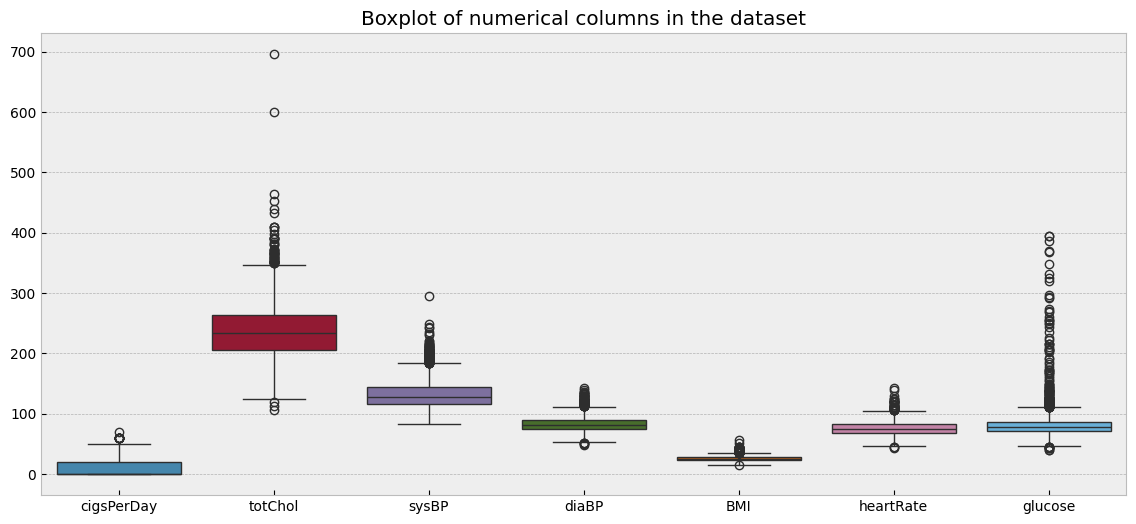

In [183]:
#remove outliars
#df = df[df['cigsPerDay'] < 50]
df = df[df['totChol'] < 500]
df = df[df['sysBP'] < 270]


# check for outliers
plt.figure(figsize=(14, 6))
sns.boxplot(df_outliars)
plt.title('Boxplot of numerical columns in the dataset')
plt.show()

<Figure size 5000x2000 with 0 Axes>

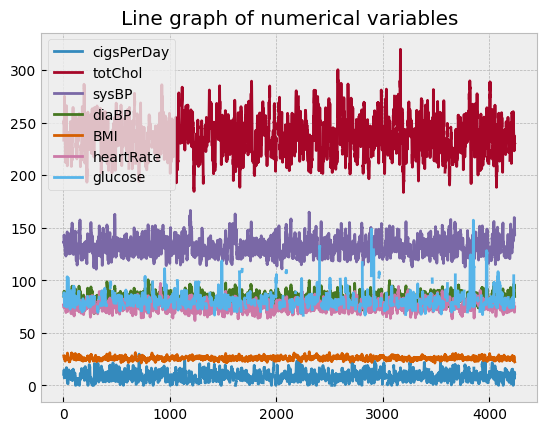

In [184]:
# make a line graph of all variables side by side
plt.figure(figsize=(50, 20))
df_outliars.rolling(window=7).mean().plot()
plt.title('Line graph of numerical variables')
plt.show()

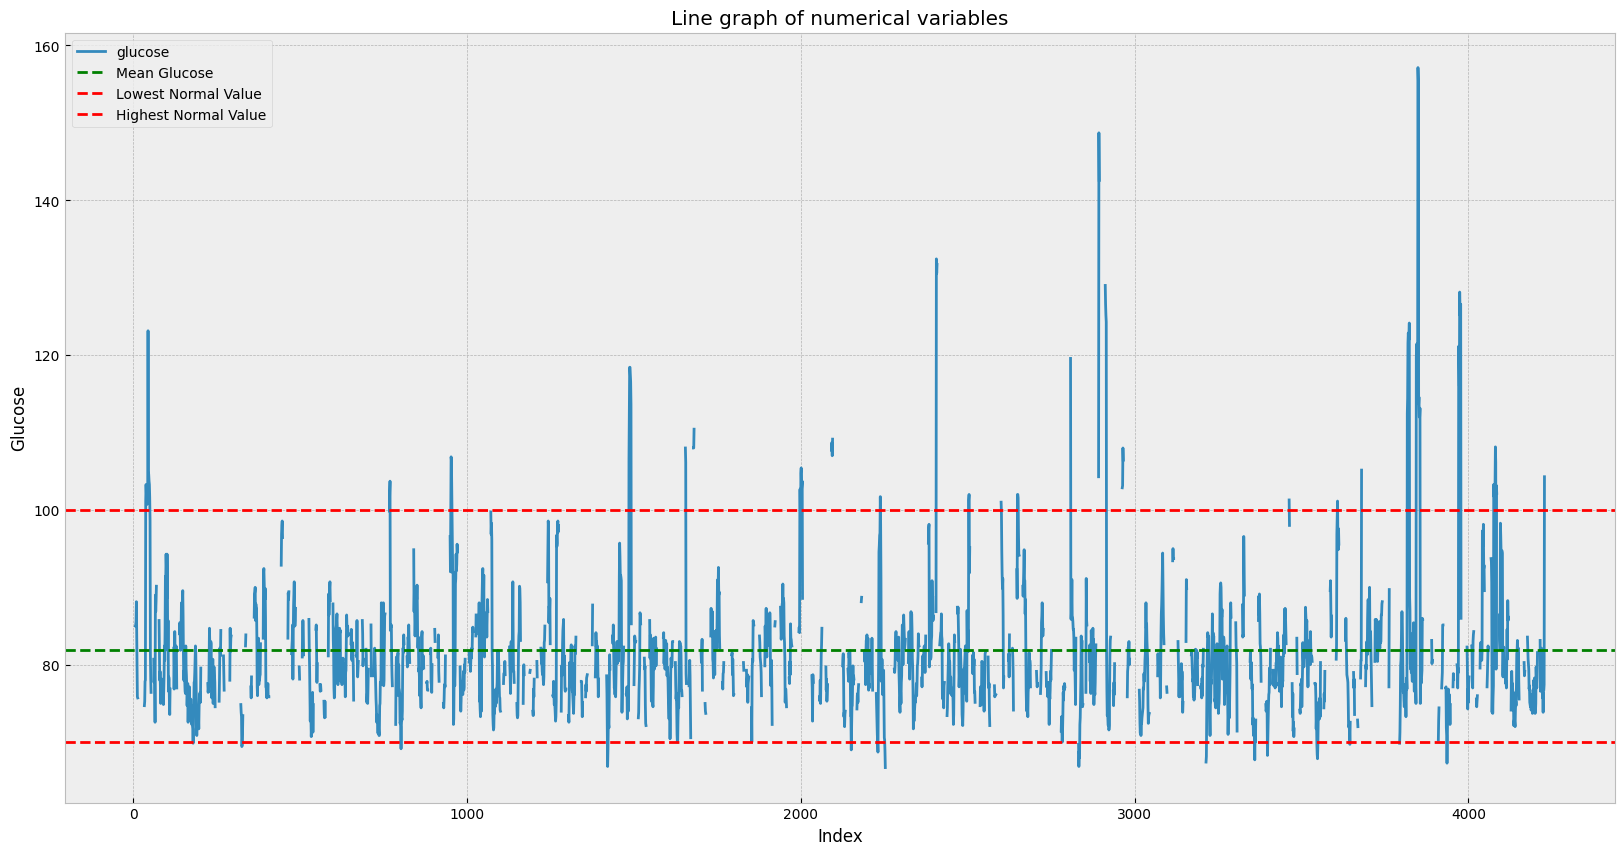

In [185]:
import matplotlib.pyplot as plt

# make a line graph of all variables side by side
plt.figure(figsize=(20, 10))
df['glucose'].rolling(window=7).mean().plot()
plt.title('Line graph of numerical variables')
plt.xlabel('Index')
plt.ylabel('Glucose')
plt.axhline(y=df['glucose'].mean(), color='g', linestyle='--', label='Mean Glucose')
plt.axhline(y=70, color='r', linestyle='--', label='Lowest Normal Value')
plt.axhline(y=100, color='r', linestyle='--', label='Highest Normal Value')
plt.legend()
plt.show()

Correlation between high glucose and diabetes are poor:

In [186]:
correlation_diabetes = df[df['glucose'] > 100]
print(len(correlation_diabetes))
print(len(correlation_diabetes[correlation_diabetes['diabetes'] == 1]))
print(len(correlation_diabetes[correlation_diabetes['diabetes'] == 1]) / len(correlation_diabetes) * 100)

309
85
27.508090614886733


In [187]:
print(df['diabetes'].value_counts())
print(df['diabetes'].value_counts(normalize=True) * 100)
#print(df['diabetes'].value_counts() / print(len(correlation_diabetes[correlation_diabetes['diabetes'] == 1]) * 100))

0    4078
1     107
Name: diabetes, dtype: int64
0    97.44325
1     2.55675
Name: diabetes, dtype: float64


First we need to clean up the dataset so that the various functions of the libraries used can work effectively and can be understood by the machine. Ensuring all data to be calculated is an integer or float datatype.

In [188]:
total_diabetes = len(correlation_diabetes[correlation_diabetes['diabetes'] == 1])
glucose_subset_diabetes = len(df[df['diabetes'] == 1])
#therefore the percentage of people with diabetes in the dataset is
print(str(int(total_diabetes / glucose_subset_diabetes * 100)) + ' %')

79 %


the .unique() method can assist me in analysing all values in a column. This helped me clean up some datatypes that where incorrect, changing them to integer values to plot instead of string values, aswell as identify null values. 
#https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

In [189]:
df['prevalentStroke'].unique() #  check for unique values in the column

array(['no', 'yes'], dtype=object)

First I analysed all the data with a bivariate correlation table. This provided a good outline for the relationship between each column and pointed out some interesting discrepencies:

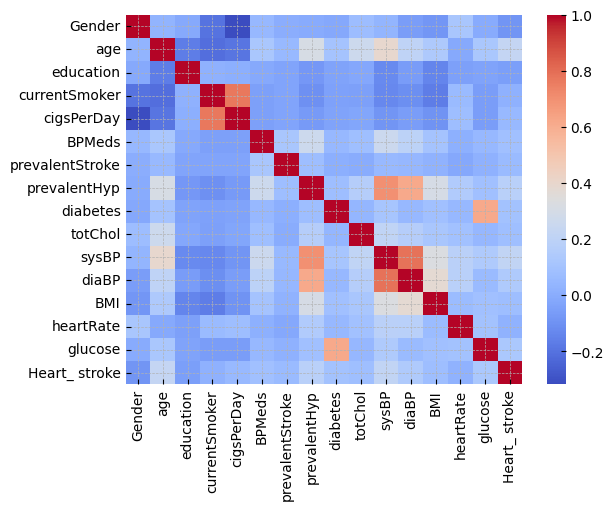

In [190]:
# Generate a correlation matrix of the DataFrame
correlation_matrix = dfint.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Show the plot

plt.show()

Histograms of all columns where the patient has had a heart stroke

Text(0.5, 0.98, 'Histogram of all participants with "Prevelant Stroke"')

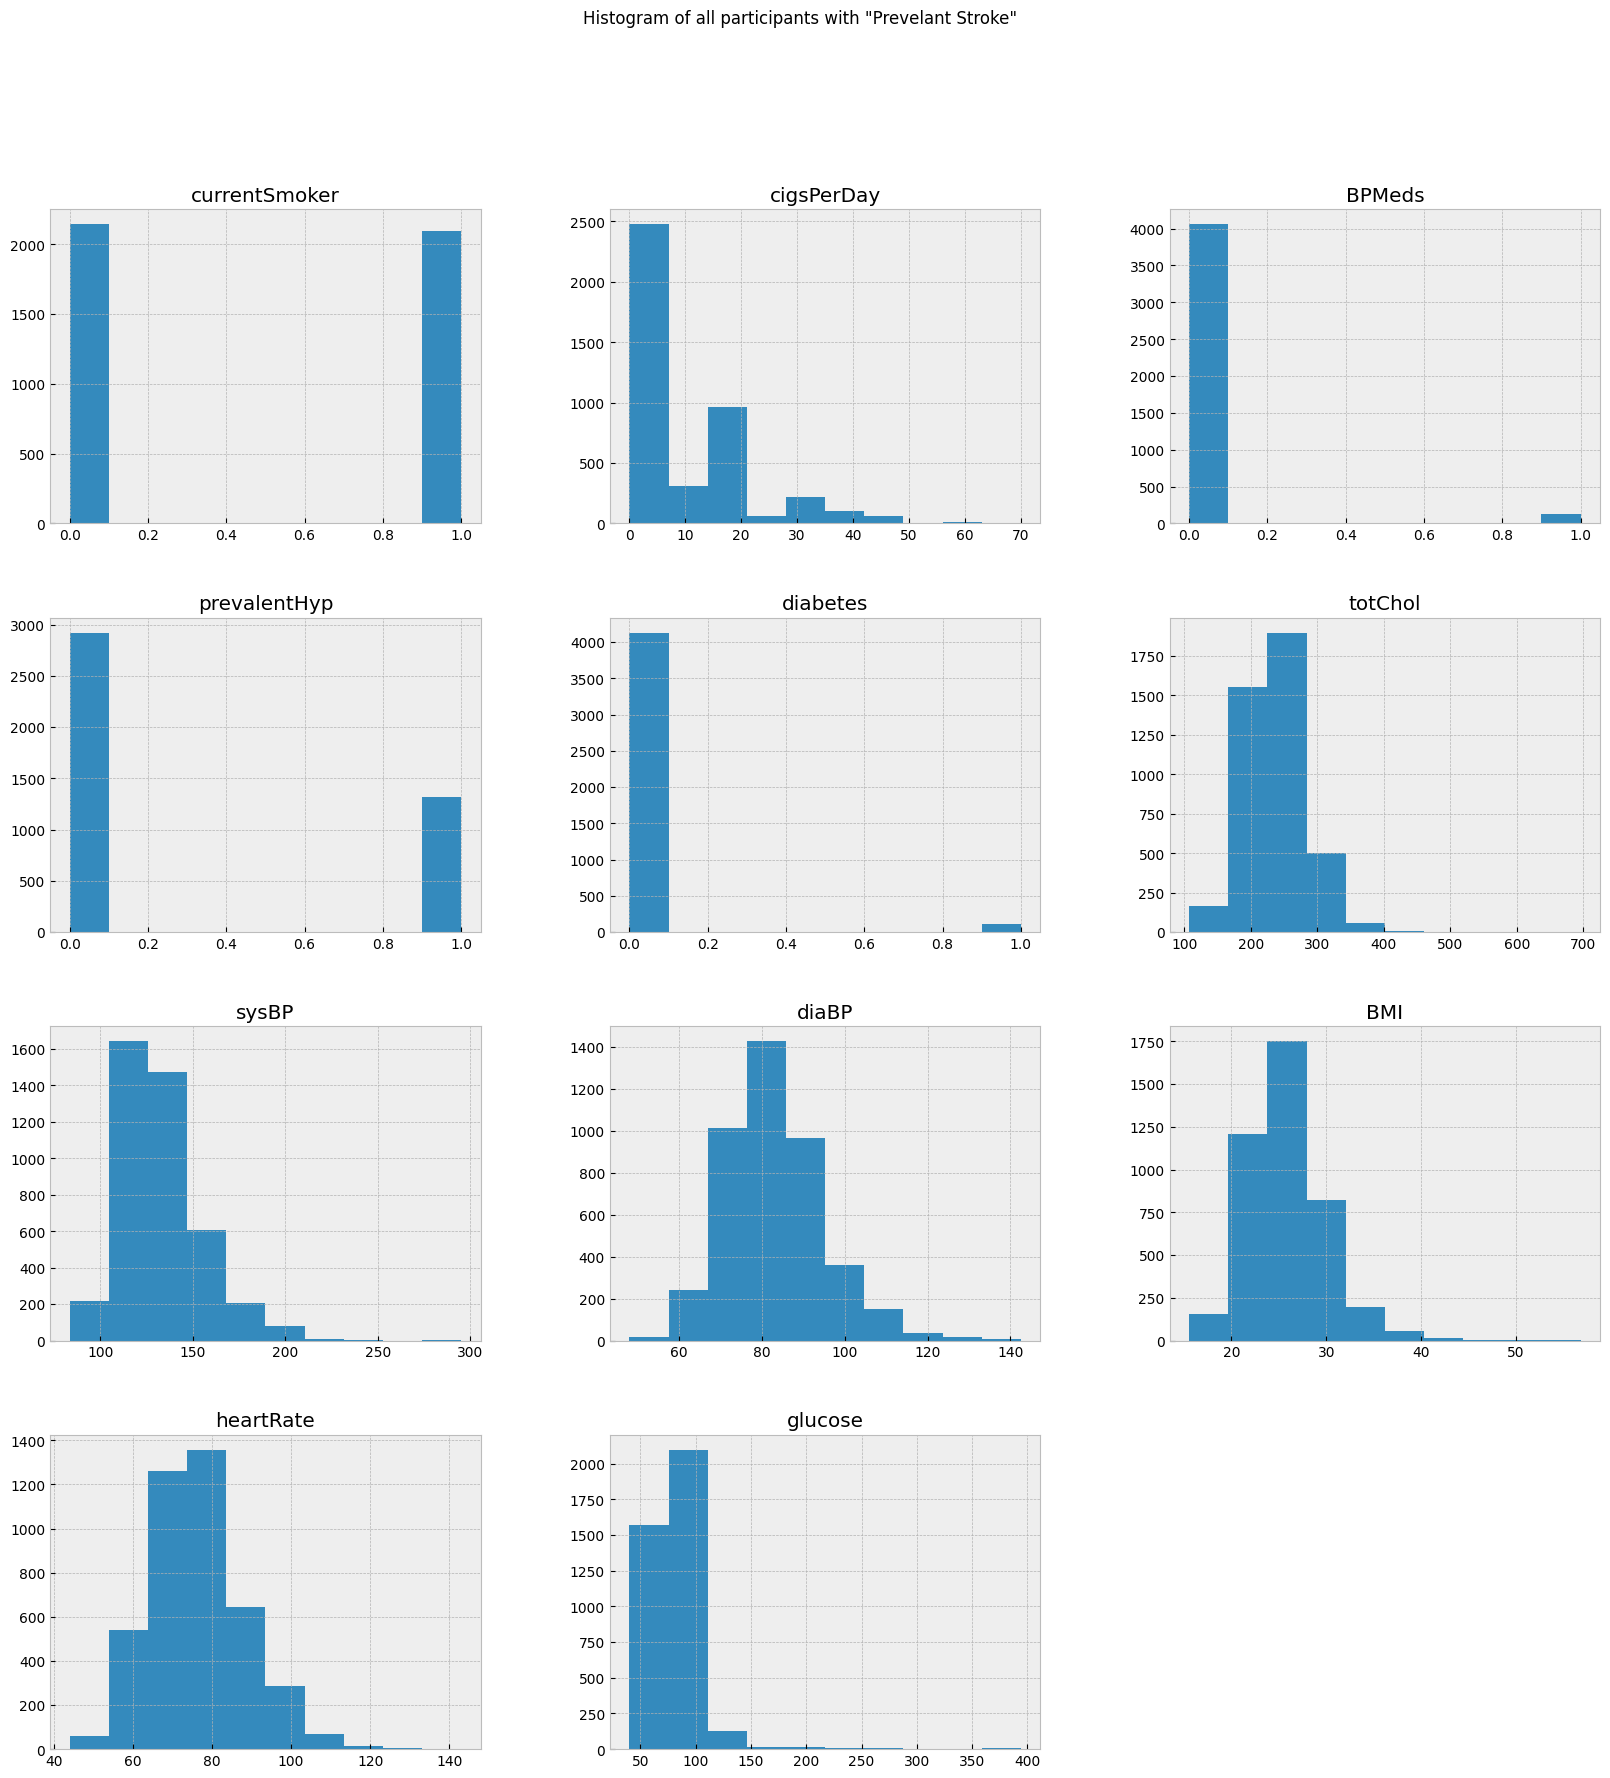

In [191]:
# creating histogram of all columns that stroke index is yes
agedf.hist(figsize=(20, 20))
#label the set of histograms
plt.suptitle('Histogram of all participants with "Prevelant Stroke"')


Another Observation here is as age increases, Blood Pressure increases (Systolic)

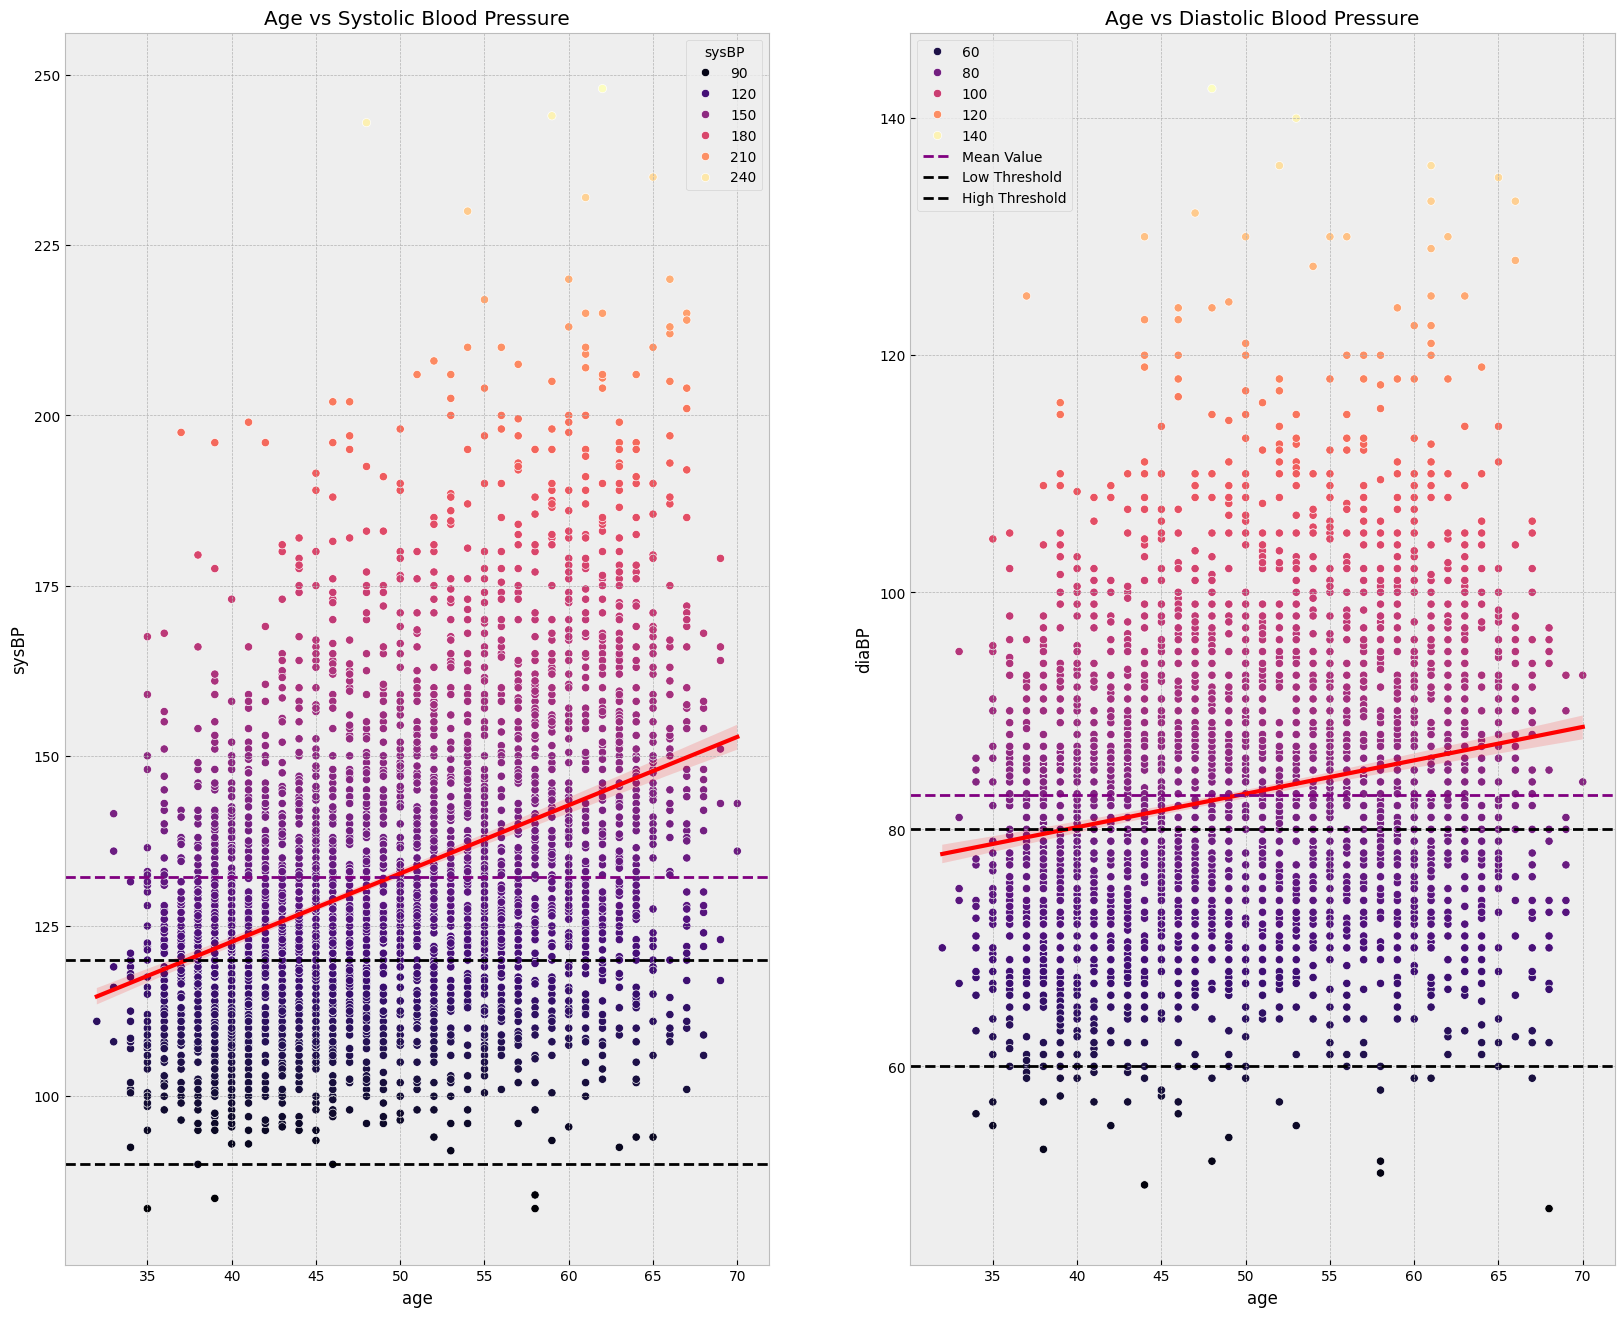

In [192]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 16))

# First plot (systolic blood pressure)
sns.scatterplot(x='age', y='sysBP', data=df, hue='sysBP', palette='magma', ax=axes[0])
sns.regplot(x='age', y='sysBP', data=df, scatter=False, color='red', ax=axes[0])
axes[0].set_title('Age vs Systolic Blood Pressure')
axes[0].axhline(y=df['sysBP'].mean(), color='purple', linestyle='--', label='Mean Value')
axes[0].axhline(y=90, color='black', linestyle='--', label='Low Threshold')
axes[0].axhline(y=120, color='black', linestyle='--', label='High Threshold')


# Second plot (diastolic blood pressure)
sns.scatterplot(x='age', y='diaBP', data=df, hue='diaBP', palette='magma', ax=axes[1])
sns.regplot(x='age', y='diaBP', data=df, scatter=False, color='red', ax=axes[1])
axes[1].set_title('Age vs Diastolic Blood Pressure')
axes[1].axhline(y=df['diaBP'].mean(), color='purple', linestyle='--', label='Mean Value')
axes[1].axhline(y=60, color='black', linestyle='--', label='Low Threshold')
axes[1].axhline(y=80, color='black', linestyle='--', label='High Threshold')
plt.legend(loc='upper left')
# Show the plot
plt.show()

Calculating the PDF of the average age of patients with a heart disease as a univariate normalised distribution. I should analyse how much % of people are in with tthe chart

68.0% of people with heart disease are between 40 and 58


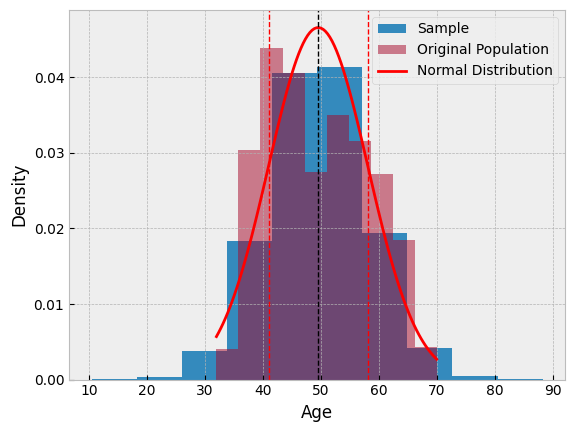

In [193]:
normal_dist = norm.pdf(df['age'].mean(), df['age'].std())


# Calculate the mean and standard deviation of the dataset
mu = df['age'].mean()
sigma = df['age'].std()

# Generate a large number of samples from the normal distribution (500,000)
samples = np.random.normal(mu, sigma, size=500000)
#refer to Markdown Source 3 for this methods documentation

# Plot the histogram of the generated samples
plt.hist(samples, bins=10, density=True, label='Sample'	)


# Plot the histogram of the dataset
plt.hist(df['age'], bins=10, density=True, alpha=0.5, label='Original Population')

# Plot the normalized distribution
x = np.linspace(df['age'].min(), df['age'].max(), 100)  # Generate 100 points between the min and max values of the dataset
y = norm.pdf(x, mu, sigma)                              # Calculate the normal distribution of the generated points
plt.plot(x, y, 'r-', label='Normal Distribution')       # Plot the normal distribution

#calculate the what % of people are between 40 and 50
# Calculate the percentage of people between 40 and 50 years old
percentageCalc = len(df[(df['age'] >= 40) & (df['age'] <= 50)]) / len(df) * 100 # Calculate the percentage of people between 40 and 50 years old

# Add a vertical line at the mean and variance
plt.axvline(mu, color='k', linestyle='dashed', linewidth=1)         # Add a vertical line at the mean
plt.axvline(mu + sigma, color='r', linestyle='dashed', linewidth=1) # Add a vertical line at the mean + variance
plt.axvline(mu - sigma, color='r', linestyle='dashed', linewidth=1) # Add a vertical line at the mean - variance

# Calculate the percentage of people between each variance
# Then round the percentage to the closest whole number
# then print the percentage of people between each standard deviation
percentage = norm.cdf(mu + sigma, mu, sigma) - norm.cdf(mu - sigma, mu, sigma)
percentage = round(percentage, 2)
print(f'{percentage * 100}% of people with heart disease are between {int(mu - sigma)} and {int(mu + sigma)}')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

Mean: 132.2710872162485, Standard Deviation: 21.887994373499627
68.0% of people with heart disease are between 110 and 154


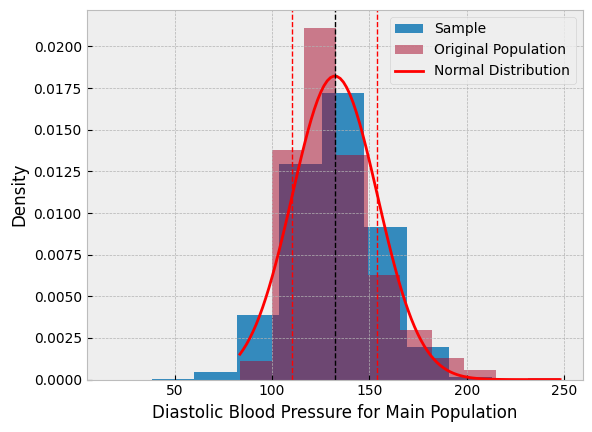

Mean: 148.66, Standard Deviation: 22.158858273837126
68.0% of people with heart disease are between 126 and 170


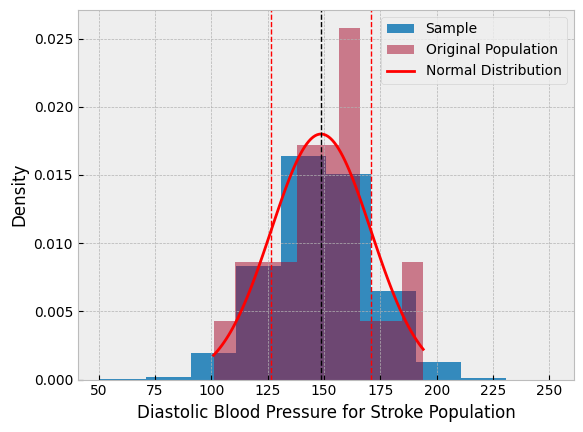

In [194]:
def mainPopulation(dataset):
    # compare and overlay the normal distributions of the diaBP between the main dataframe and the stroke subset of the dataframe saved as stroke variable
    # Calculate the mean and standard deviation of the dataset
    mu = dataset['sysBP'].mean()
    sigma = dataset['sysBP'].std()

    print(f'Mean: {mu}, Standard Deviation: {sigma}')

    # Generate a large number of samples from the normal distribution (500,000)
    samples = np.random.normal(mu, sigma, size=500000)

    # Plot the histogram of the generated samples
    plt.hist(samples, bins=10, density=True, label='Sample')

    # Plot the histogram of the dataset
    plt.hist(dataset['sysBP'], bins=10, density=True, alpha=0.5, label='Original Population')

    # Plot the normalized distribution
    x = np.linspace(dataset['sysBP'].min(), dataset['sysBP'].max(), 100)  # Generate 100 points between the min and max values of the dataset
    y = norm.pdf(x, mu, sigma)                                 # Calculate the normal distribution of the generated points
    plt.plot(x, y, 'r-', label='Normal Distribution')          # Plot the normal distribution

    # Add a vertical line at the mean and variance
    plt.axvline(mu, color='k', linestyle='dashed', linewidth=1)         # Add a vertical line at the mean
    plt.axvline(mu + sigma, color='r', linestyle='dashed', linewidth=1) # Add a vertical line at the mean + variance
    plt.axvline(mu - sigma, color='r', linestyle='dashed', linewidth=1) # Add a vertical line at the mean - variance

    # Calculate the percentage of people between each variance
    # Then round the percentage to the closest whole number
    percentage = norm.cdf(mu + sigma, mu, sigma) - norm.cdf(mu - sigma, mu, sigma)
    percentage = round(percentage, 2)
    print(f'{percentage * 100}% of people with heart disease are between {int(mu - sigma)} and {int(mu + sigma)}')

    # Add labels and legend
    plt.xlabel(f'Diastolic Blood Pressure for {"Main Population" if dataset is df else "Stroke Population"}')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

mainPopulation(df)
mainPopulation(has_stroke)

Perform T-Test of the two populations:

In [195]:
#perform a t-test to determine if there is a significant difference between the mean of the diaBP of the main population and the stroke population
t_stat, p_val = ttest_ind(df['diaBP'], has_stroke['diaBP'])
print(f'T-Statistic: {t_stat}, P-Value: {p_val}')

T-Statistic: -2.941850760457897, P-Value: 0.0032803731554448506


In [196]:
#perform a t-test on diaBP between stroke dataframe and df
# Perform a t-test on the diastolic blood pressure between people with and without a stroke
t_stat, p_val = ttest_ind(stroke['diaBP'], df['diaBP'])
print(ttest_ind(stroke['diaBP'], df['diaBP']))

# Print the t-statistic and p-value
print(f'The t-statistic is: {t_stat}')
print(f'The p-value is: {p_val}')


TtestResult(statistic=0.07069490259141503, pvalue=0.9436422565497994, df=8421.0)
The t-statistic is: 0.07069490259141503
The p-value is: 0.9436422565497994


In [197]:
# Perform a t-test between the age and prevalentStroke columns
t_stat, p_value = ttest_ind(dfint['age'], dfint['prevalentStroke'])
print(f'T-Statistic: {t_stat}\nP-Value: {p_value}')

T-Statistic: 376.50526243041577
P-Value: 0.0


0 99


Text(0.5, 1.0, 'Percentage of People with a Prevalent Stroke')

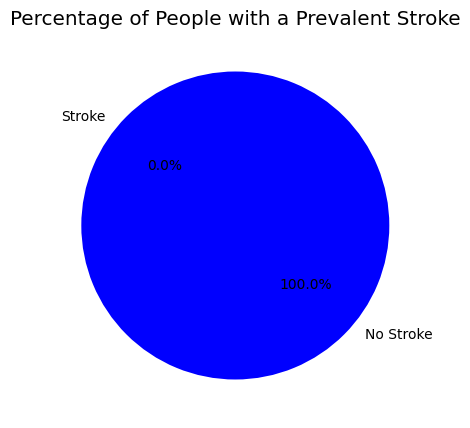

In [198]:
#make a pie chart for a percentage of the dataset that has stroke
# Calculate the percentage of people with a prevalent stroke
stroke_percentage = int(len(dfint[dfint['prevalentStroke'] == 1]) / len(dfint) * 100)

# Calculate the percentage of people without a prevalent stroke
no_stroke_percentage = int(len(dfint[dfint['prevalentStroke'] == 0]) / len(dfint) * 100)
print(stroke_percentage, no_stroke_percentage)

# Create a pie chart
plt.figure(figsize=(10, 5))
plt.pie([stroke_percentage, no_stroke_percentage], labels=['Stroke', 'No Stroke'], autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])

# Add a title
plt.title('Percentage of People with a Prevalent Stroke')

The random.normal() method is used to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.
#- W3Schools. (n.d.). Normal (Gaussian) Distribution. Retrieved 6 May 2024, from https://www.w3schools.com/python/numpy/numpy_random_normal.asp

References:
________________________________________________________
The random.normal() method is used to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.
#- W3Schools. (n.d.). Normal (Gaussian) Distribution. Retrieved 6 May 2024, from https://www.w3schools.com/python/numpy/numpy_random_normal.asp

numpy. (n.d.). numpy.random.normal—NumPy v1.26 Manual. Retrieved 6 May 2024, from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
________________________________________________________
np.random.normal()
GitHub Copilot
used @workspace /explain
The line of code you've selected is using the np.random.normal() function from the NumPy library in Python. This function generates random numbers based on the normal (or Gaussian) distribution.

The np.random.normal() function takes three arguments:

loc: This is the mean (mu) of the distribution. This is where the peak of the bell curve will be.
scale: This is the standard deviation (sigma) of the distribution. This determines the width of the bell curve. A larger standard deviation will result in a wider curve (more spread out data), and a smaller standard deviation will result in a narrower curve (data closer to the mean).
size: This is the number of random numbers to generate. If you don't provide a size, the function will return a single random number.
In your code, np.random.normal(mu, sigma, size=10000) is generating 10,000 random numbers from a normal distribution with mean mu and standard deviation sigma.

The numbers generated by this function can be used for a variety of purposes, such as initializing the weights in a neural network, creating noise for a simulation, or generating synthetic data for testing algorithms.
______________________________________________________